In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
csv_in = 'varied.csv'

# To show more rows and columns
pd.options.display.max_rows = 999 
pd.options.display.max_columns = 999 

In [3]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=0, header=0)
print(df.shape)
print(df.info())
display(df.head())

(1500, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      1500 non-null   float64
 1   x1      1500 non-null   float64
dtypes: float64(2)
memory usage: 23.6 KB
None


,x0,x1
0,-0.48,1.03
1,-0.77,0.85
2,-1.48,-1.91
3,-0.15,-0.14
4,0.41,0.54


In [4]:
df_data = df.copy()

D:\PROGRAM_FILES\miniconda3\envs\ds2021\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


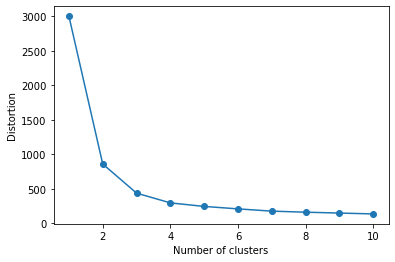

In [5]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(df_data)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [6]:
n_cls = 3
km = KMeans(n_clusters=n_cls, random_state=29)
cls = km.fit_predict(df_data)

In [7]:
print(cls)

[2 2 1 ... 0 0 0]


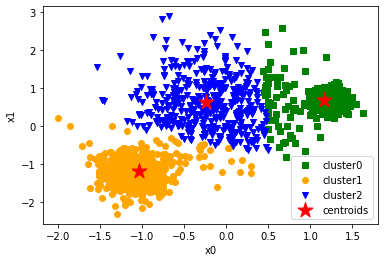

In [8]:
colors = ['green', 'orange', 'blue']
markers = ['s', 'o', 'v']
for i in range(n_cls):
    df_cls = df_data[ cls==i ]
    plt.scatter(df_cls['x0'], df_cls['x1'],
                c=colors[i], marker=markers[i],
                label='cluster{}'.format(i))
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*', c='red',
            label='centroids')
plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()
plt.show()

In [9]:
n_cls = 4
km = KMeans(n_clusters=n_cls, random_state=7)
cls = km.fit_predict(df_data)

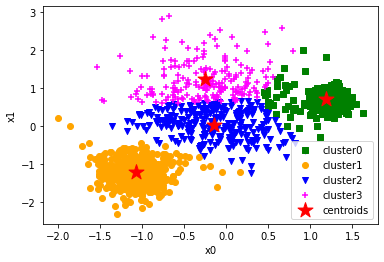

In [10]:
colors = ['green', 'orange', 'blue', 'magenta']
markers = ['s', 'o', 'v', '+']
for i in range(n_cls):
    df_cls = df_data[ cls==i ]
    plt.scatter(df_cls['x0'], df_cls['x1'],
                c=colors[i], marker=markers[i],
                label='cluster{}'.format(i))
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*', c='red',
            label='centroids')
plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()
plt.show()